## Imports



In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

# Tratamento

#### 2019

In [2]:
chunksize = 10000
chunks = pd.read_csv(
    'MICRODADOS_ENEM_2019.csv',
    chunksize=chunksize,
    on_bad_lines='skip',
    encoding='latin1',
    delimiter=";"
)

df_raw = pd.concat(chunks)

In [3]:
colunas_interesse = [
    'NU_INSCRICAO', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 'SG_UF_RESIDENCIA', 
    'TP_ESCOLA', 'IN_TREINEIRO',
    'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 
    'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 
    'TP_STATUS_REDACAO',
    'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'SG_UF_PROVA', 
    'CO_MUNICIPIO_PROVA', 'NO_MUNICIPIO_PROVA',
    'CO_MUNICIPIO_RESIDENCIA','NO_MUNICIPIO_RESIDENCIA', 'CO_MUNICIPIO_ESC','NO_MUNICIPIO_ESC',
]

In [4]:
df = df_raw[colunas_interesse]

In [5]:
df = df[
  (df['SG_UF_RESIDENCIA'] == 'CE')
   ]

In [6]:
len(df[
  df['CO_MUNICIPIO_PROVA'] != df['CO_MUNICIPIO_RESIDENCIA']
])

33431

In [7]:
df['Tem_Computador'] = np.where(df['Q024'] == 'A', 0, 1) 
df['Tem_Internet'] = np.where(df['Q025'] == 'A', 0, 1) 
df['Inclusao_Digital_Plena'] = df['Tem_Computador'] * df['Tem_Internet']
df['NU_NOTA_GERAL'] = (df['NU_NOTA_CN'] + df['NU_NOTA_CH'] + df['NU_NOTA_LC'] + df['NU_NOTA_MT'] + df['NU_NOTA_REDACAO']) / 5


In [8]:
df = df[
  (df['TP_PRESENCA_CH'] * df['TP_PRESENCA_LC'] * df['TP_PRESENCA_CN'] * df['TP_PRESENCA_MT']) == 1 
]

In [9]:
df.isnull().sum()

NU_INSCRICAO                    0
NU_IDADE                        5
TP_SEXO                         0
TP_COR_RACA                     0
SG_UF_RESIDENCIA                0
TP_ESCOLA                       0
IN_TREINEIRO                    0
TP_PRESENCA_CN                  0
TP_PRESENCA_CH                  0
TP_PRESENCA_LC                  0
TP_PRESENCA_MT                  0
NU_NOTA_CN                      0
NU_NOTA_CH                      0
NU_NOTA_LC                      0
NU_NOTA_MT                      0
NU_NOTA_REDACAO                 0
TP_STATUS_REDACAO               0
Q001                            0
Q002                            0
Q006                            0
Q024                            0
Q025                            0
SG_UF_PROVA                     0
CO_MUNICIPIO_PROVA              0
NO_MUNICIPIO_PROVA              0
CO_MUNICIPIO_RESIDENCIA         0
NO_MUNICIPIO_RESIDENCIA         0
CO_MUNICIPIO_ESC           133757
NO_MUNICIPIO_ESC           133757
Tem_Computador

In [10]:
df_indicadores_mun = df.groupby('NO_MUNICIPIO_RESIDENCIA').agg(
    Total_Alunos=('Inclusao_Digital_Plena', 'count'),
    Total_Inclusao_Digital=('Inclusao_Digital_Plena', 'sum'),
    Taxa_Inclusao_Digital=('Inclusao_Digital_Plena', 'mean'),
    Internet =('Tem_Internet', 'sum'),
    Taxa_Internet=('Tem_Internet', 'mean'),
    Computador =('Tem_Computador', 'sum'),
    Taxa_Computador=('Tem_Computador', 'mean'),
    Nota_Redacao=('NU_NOTA_REDACAO', 'mean'),
    Nota_CH=('NU_NOTA_CH', 'mean'),
    Nota_Mat=('NU_NOTA_MT', 'mean'),
    Nota_LC=('NU_NOTA_LC', 'mean'),
    Nota_CN=('NU_NOTA_CN', 'mean'),
    Nota_Media_Geral=('NU_NOTA_GERAL', 'mean')
).reset_index()
df_indicadores_mun['Taxa_Alunos'] = df_indicadores_mun['Total_Alunos'] / df_indicadores_mun['Total_Alunos'].sum()
# df_indicadores_mun['Nenhum'] = df_indicadores_mun['Total_Alunos'] - (df_indicadores_mun['Internet'] + df_indicadores_mun['Computador'] - df_indicadores_mun['Total_Inclusao_Digital'])
# df_indicadores_mun['Taxa Nenhum'] = df_indicadores_mun['Nenhum'] / df_indicadores_mun['Total_Alunos']

#### 2024

In [11]:
chunksize = 10000
chunks = pd.read_csv(
    'RESULTADOS_2024.csv',
    chunksize=chunksize,
    on_bad_lines='skip',
    encoding='latin1',
    delimiter=";"
)

df24 = pd.concat(chunks)
chunksize = 10000
chunks = pd.read_csv(
    'PARTICIPANTES_2024.csv',
    chunksize=chunksize,
    on_bad_lines='skip',
    encoding='latin1',
    delimiter=";"
)

alunos24 = pd.concat(chunks)
alunos24 = alunos24[alunos24['SG_UF_PROVA'] == 'CE']
df24 = df24[df24['SG_UF_PROVA'] == 'CE']
alunos24 = alunos24.rename(columns={'Q020': 'Internet', 'Q021': 'Computador'})
alunos24['Tem_Computador'] = np.where(alunos24['Computador'] == 'A', 0, 1) 
alunos24['Tem_Internet'] = np.where(alunos24['Internet'] == 'A', 0, 1) 
alunos24['Inclusao_Digital_Plena'] = alunos24['Tem_Computador'] * alunos24['Tem_Internet']

df24['Nota_Media_Geral'] = (df24['NU_NOTA_CH'] + df24['NU_NOTA_CN'] + df24['NU_NOTA_LC']  + df24['NU_NOTA_MT'] + df24['NU_NOTA_REDACAO']) / 5
df24.dropna(subset=['Nota_Media_Geral'], inplace=True)

In [17]:
alunos24.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_FAIXA_ETARIA', 'TP_SEXO',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ENSINO', 'IN_TREINEIRO', 'CO_MUNICIPIO_PROVA',
       'NO_MUNICIPIO_PROVA', 'CO_UF_PROVA', 'SG_UF_PROVA', 'Q001', 'Q002',
       'Q003', 'Q004', 'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011',
       'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019',
       'Internet', 'Computador', 'Q022', 'Q023', 'Tem_Computador',
       'Tem_Internet', 'Inclusao_Digital_Plena'],
      dtype='object')

In [19]:
alunos_agrupado2024 = alunos24[['Inclusao_Digital_Plena', 'Tem_Computador', 'Tem_Internet', 'NO_MUNICIPIO_PROVA']].groupby('NO_MUNICIPIO_PROVA').agg(
    Total_Alunos=('Inclusao_Digital_Plena', 'count'),
    Total_Inclusao_Digital=('Inclusao_Digital_Plena', 'sum'),
    Taxa_Inclusao_Digital=('Inclusao_Digital_Plena', 'mean'),
    Internet =('Tem_Internet', 'sum'),
    Taxa_Internet=('Tem_Internet', 'mean'),
    Computador =('Tem_Computador', 'sum'),
    Taxa_Computador=('Tem_Computador', 'mean')).reset_index().sort_values(by=['Taxa_Inclusao_Digital'], ascending=False)
alunos_agrupado2024['Taxa_Alunos'] = alunos_agrupado2024['Total_Alunos'] / alunos_agrupado2024['Total_Alunos'].sum()

df24_agrupado = df24.groupby('NO_MUNICIPIO_PROVA').agg(
    Total_Alunos=('NU_SEQUENCIAL', 'count'),
    Nota_Redacao=('NU_NOTA_REDACAO', 'mean'),
    Nota_CH=('NU_NOTA_CH', 'mean'),
    Nota_Mat=('NU_NOTA_MT', 'mean'),
    Nota_LC=('NU_NOTA_LC', 'mean'),
    Nota_CN=('NU_NOTA_CN', 'mean'),
    Nota_Media_Geral=('Nota_Media_Geral', 'mean')

).reset_index().sort_values(by=['Nota_Media_Geral'], ascending=False)

df_indicadores_mun24 = pd.merge(df24_agrupado.drop('Total_Alunos', axis=1), alunos_agrupado2024, on='NO_MUNICIPIO_PROVA', how='inner')

In [20]:
total_alunos = df_indicadores_mun['Total_Alunos'].sum()
total_inclusao = df_indicadores_mun['Total_Inclusao_Digital'].sum()
total_internet =  df_indicadores_mun['Internet'].sum()
total_comp =  df_indicadores_mun['Computador'].sum()

print(f"Total de Alunos: {total_alunos}")
print(f"Total com Inclusão Digital Plena: {total_inclusao}")
print(f"Total com Internet: {total_internet}")
print(f"Total com Computador(es): {total_comp}")




Total de Alunos: 221918
Total com Inclusão Digital Plena: 79217
Total com Internet: 151821
Total com Computador(es): 83553


In [36]:
pc19 = 0.28
pc24 = 0.22

(pc24 - pc19)/pc19

-0.21428571428571436

In [29]:
display(df_indicadores_mun[['Nota_Media_Geral', 'Taxa_Computador', 'Taxa_Internet', 'Taxa_Inclusao_Digital']].corr().sort_values(by=['Nota_Media_Geral'], ascending=False))

,Nota_Media_Geral,Taxa_Computador,Taxa_Internet,Taxa_Inclusao_Digital
Nota_Media_Geral,1.000000,0.689898,0.467421,0.687442
Taxa_Computador,0.689898,1.000000,0.781873,0.991925
Taxa_Inclusao_Digital,0.687442,0.991925,0.802013,1.000000
Taxa_Internet,0.467421,0.781873,1.000000,0.802013


In [28]:
display(df_indicadores_mun24[['Nota_Media_Geral', 'Taxa_Computador', 'Taxa_Internet', 'Taxa_Inclusao_Digital']].corr().sort_values(by=['Nota_Media_Geral'], ascending=False))

,Nota_Media_Geral,Taxa_Computador,Taxa_Internet,Taxa_Inclusao_Digital
Nota_Media_Geral,1.000000,0.734011,0.289767,0.735606
Taxa_Inclusao_Digital,0.735606,0.999466,0.572621,1.000000
Taxa_Computador,0.734011,1.000000,0.567974,0.999466
Taxa_Internet,0.289767,0.567974,1.000000,0.572621


# 2019

## Análise

In [44]:
df_indicadores_mun.describe()

,Total_Alunos,Total_Inclusao_Digital,Taxa_Inclusao_Digital,Internet,Taxa_Internet,Computador,Taxa_Computador,Nota_Redacao,Nota_CH,Nota_Mat,Nota_LC,Nota_CN,Nota_Media_Geral,Taxa_Alunos
count,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,1206.076087,430.527174,0.258087,825.114130,0.600494,454.092391,0.277906,537.963427,482.137516,498.957680,497.554803,452.241601,493.771005,0.005435
std,5232.970169,2540.162174,0.086641,4168.062477,0.138237,2633.430800,0.086898,38.193596,11.732522,15.277531,11.034383,10.940612,15.846598,0.023581
min,112.000000,12.000000,0.064327,43.000000,0.181287,15.000000,0.064327,398.222222,451.219934,459.280399,463.672593,424.424585,447.316741,0.000505
25%,289.000000,61.000000,0.202331,164.750000,0.526066,65.000000,0.223770,514.539057,475.372990,489.229321,491.182373,445.105372,484.034055,0.001302
50%,500.500000,127.000000,0.251989,303.500000,0.611535,135.500000,0.271937,537.412239,481.189663,498.220447,496.786310,450.319247,492.394866,0.002255
75%,991.000000,235.000000,0.306356,558.500000,0.706405,256.000000,0.321613,562.852571,488.554188,508.463277,503.759342,458.415350,503.918064,0.004466
max,70351.000000,34178.000000,0.487013,56014.000000,0.831557,35425.000000,0.503547,642.332671,523.633675,544.374453,533.192063,489.271030,540.597072,0.317013


### Análise Univariada da nota média

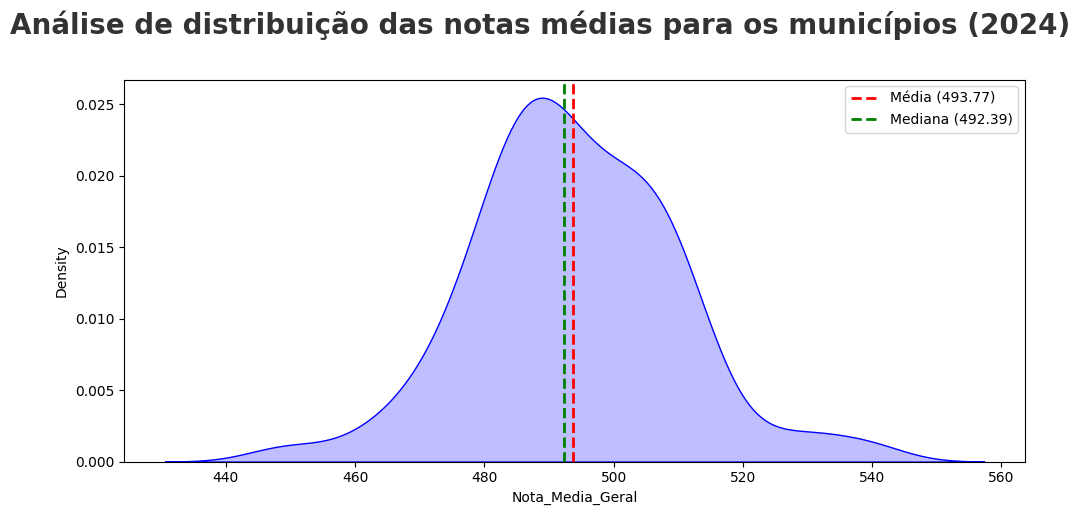

Média: 493.7710054542269
Mediana: 492.39486584330257
Skew: 0.1425416443688345


In [45]:
plt.figure(figsize=(10, 5))
plt.suptitle(
    "Análise de distribuição das notas médias para os municípios (2024)",
    fontsize=20,
    fontweight='bold',
    alpha=0.8,
    y=1.02
)

# KDE plot
sns.kdeplot(
    data=df_indicadores_mun,
    x='Nota_Media_Geral',
    fill=True,
    color='blue'
)

# Calculando média e mediana
media = df_indicadores_mun['Nota_Media_Geral'].mean()
mediana = df_indicadores_mun['Nota_Media_Geral'].median()
skew = df_indicadores_mun['Nota_Media_Geral'].skew()

# Linhas verticais
plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f"Média ({media:.2f})")
plt.axvline(mediana, color='green', linestyle='--', linewidth=2, label=f"Mediana ({mediana:.2f})")

# Legenda
plt.legend()

plt.tight_layout()
plt.show()

print(f"Média: {media}")
print(f"Mediana: {mediana}")
print(f"Skew: {skew}")

> A nota média se concentra entre 490 e 500

### Análise Univariada da gestão digital

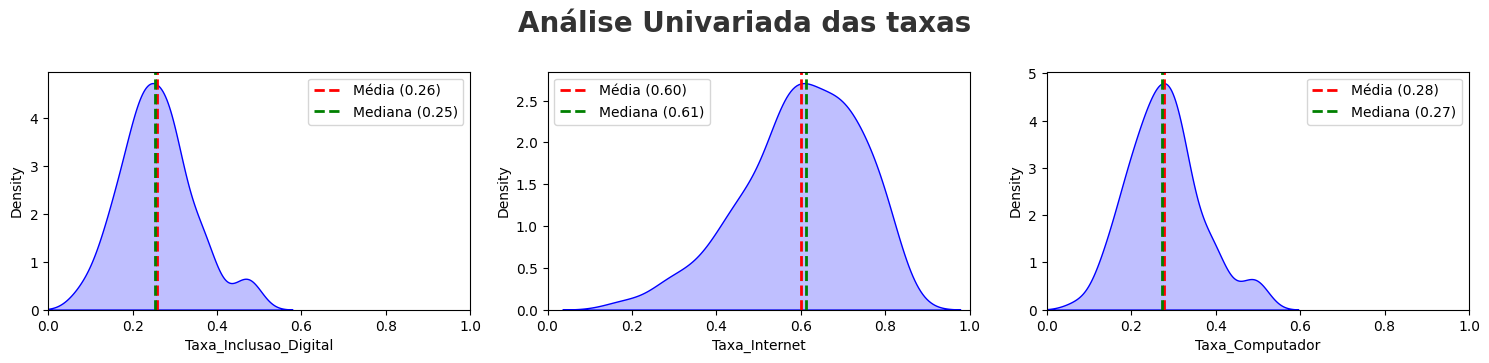

In [46]:
plt.figure(figsize=(15, 15))
plt.suptitle("Análise Univariada das taxas", fontsize=20, fontweight='bold', alpha=0.8, y=1.0)

numeric_features = ['Taxa_Inclusao_Digital', 'Taxa_Internet', 'Taxa_Computador']

for i in range(len(numeric_features)):
    # 1. PRIMEIRO ative o subplot correto
    plt.subplot(5, 3, i+1)
    
    # 2. Desenhe o gráfico principal (KDE)
    sns.kdeplot(data=df_indicadores_mun, x=numeric_features[i], fill=True, color='blue')
    
    # 3. Calcule as estatísticas
    media = df_indicadores_mun[numeric_features[i]].mean()
    mediana = df_indicadores_mun[numeric_features[i]].median()
    
    # 4. AGORA desenhe as linhas (elas vão aparecer no subplot ativo acima)
    plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f"Média ({media:.2f})")
    plt.axvline(mediana, color='green', linestyle='--', linewidth=2, label=f"Mediana ({mediana:.2f})")
    
    # Configurações adicionais
    plt.xlabel(numeric_features[i])
    plt.xlim(0, 1)
    plt.legend() # Adicionei para mostrar as labels da média/mediana

plt.tight_layout()
plt.show()

> A distribuição de probabilidade aponta para um cenário ruim tanto na taxa de inclusão digital quanto na taxa_computador. O que significa dizer que existe um inclusão digital "parcial", mais voltada à conectividade do que a dispositivos. O que no cenário educacional prejudica mais os alunos, pois ter internet sem um dispositivo adequado não ajuda no desempenho dos mesmos.

> A taxa de inclusão digital tem uma média entre 26% apenas entre os municípios

## Análise Bivariada

### Matriz de Correlação

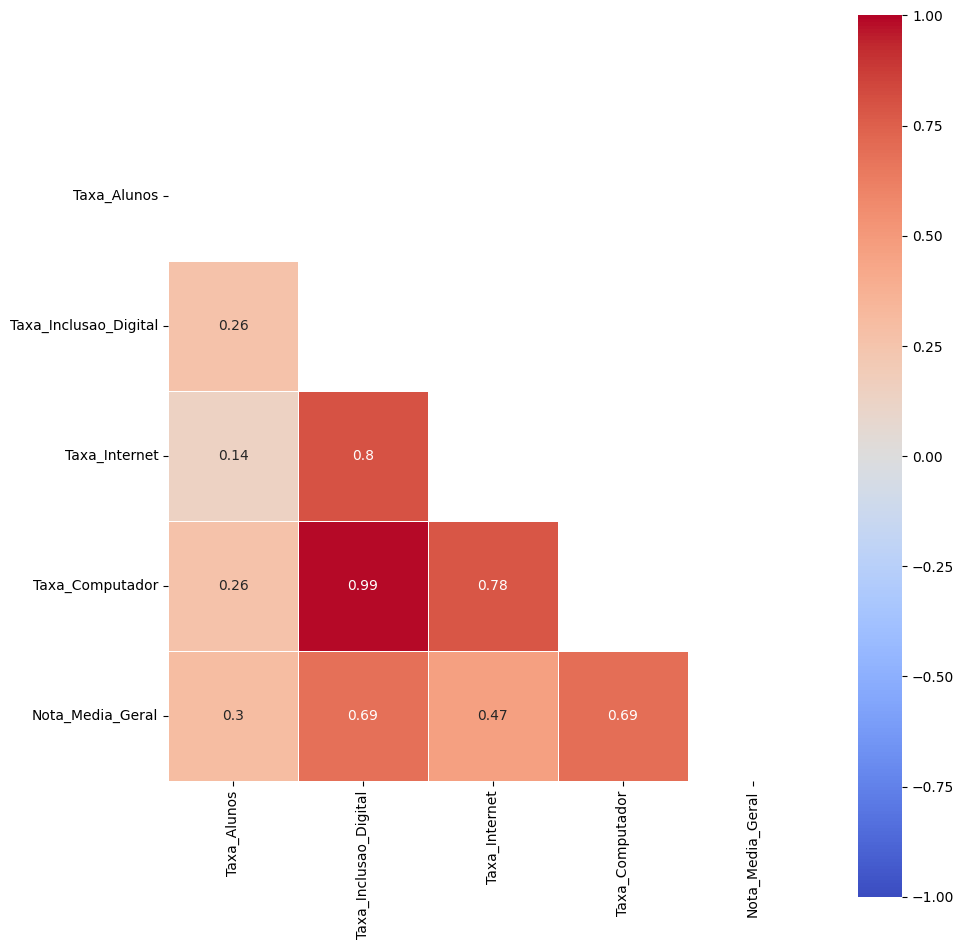

In [47]:
correlations = df_indicadores_mun[['Taxa_Alunos','Taxa_Inclusao_Digital','Taxa_Internet', 'Taxa_Computador', 'Nota_Media_Geral']].corr()
mask = np.triu(np.ones_like(correlations, dtype=bool))
plt.figure(figsize=(10,10))
sns.heatmap(correlations, 
            annot=True,
            mask=mask,
            cmap='coolwarm',  
            square=True, 
            linewidths=.5, 
            cbar=True, 
            vmin=-1, 
            vmax=1)

plt.tight_layout()

# Mostre o heatmap
plt.show()

> A "Inclusão Digital" não é travada pela falta de cabos ou conectividade, mas sim pela falta do dispositivos. A política pública deveria focar em hardware, pois a conectividade já parece acompanhar quem tem o hardware. Basicamente, acesso a internet sem o dispotivo adequado (um celular não é o suficiente) não ajuda tanto assim.

# 2024

### Analise de distribuição da nota média

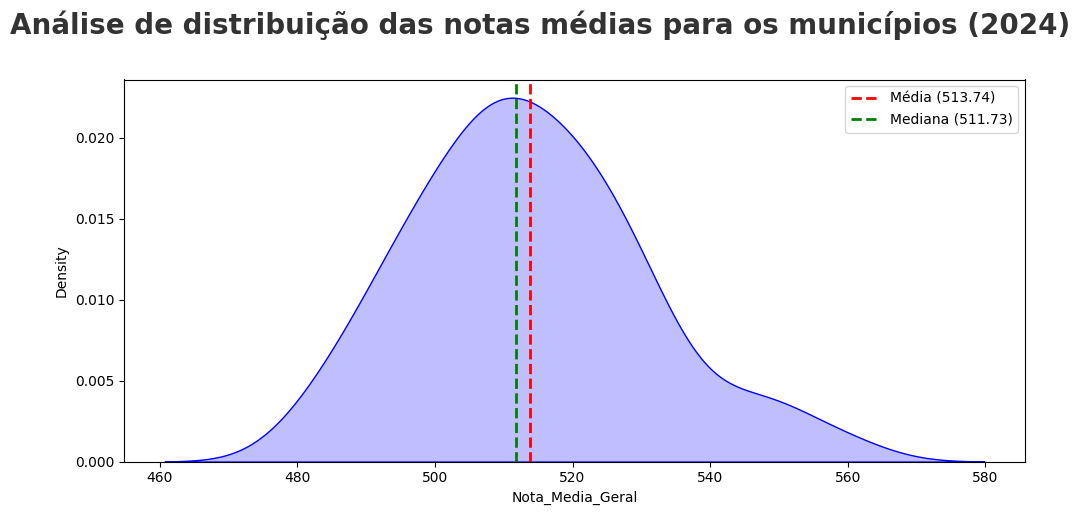

Média: 513.7424981829229
Mediana: 511.7280031721991


In [48]:
plt.figure(figsize=(10, 5))
plt.suptitle(
    "Análise de distribuição das notas médias para os municípios (2024)",
    fontsize=20,
    fontweight='bold',
    alpha=0.8,
    y=1.02
)

# KDE plot
sns.kdeplot(
    data=df_indicadores_mun24,
    x='Nota_Media_Geral',
    fill=True,
    color='blue'
)

# Calculando média e mediana
media = df_indicadores_mun24['Nota_Media_Geral'].mean()
mediana = df_indicadores_mun24['Nota_Media_Geral'].median()

# Linhas verticais
plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f"Média ({media:.2f})")
plt.axvline(mediana, color='green', linestyle='--', linewidth=2, label=f"Mediana ({mediana:.2f})")

# Legenda
plt.legend()

plt.tight_layout()
plt.show()

print(f"Média: {media}")
print(f"Mediana: {mediana}")


### Análise de distribuição das taxas

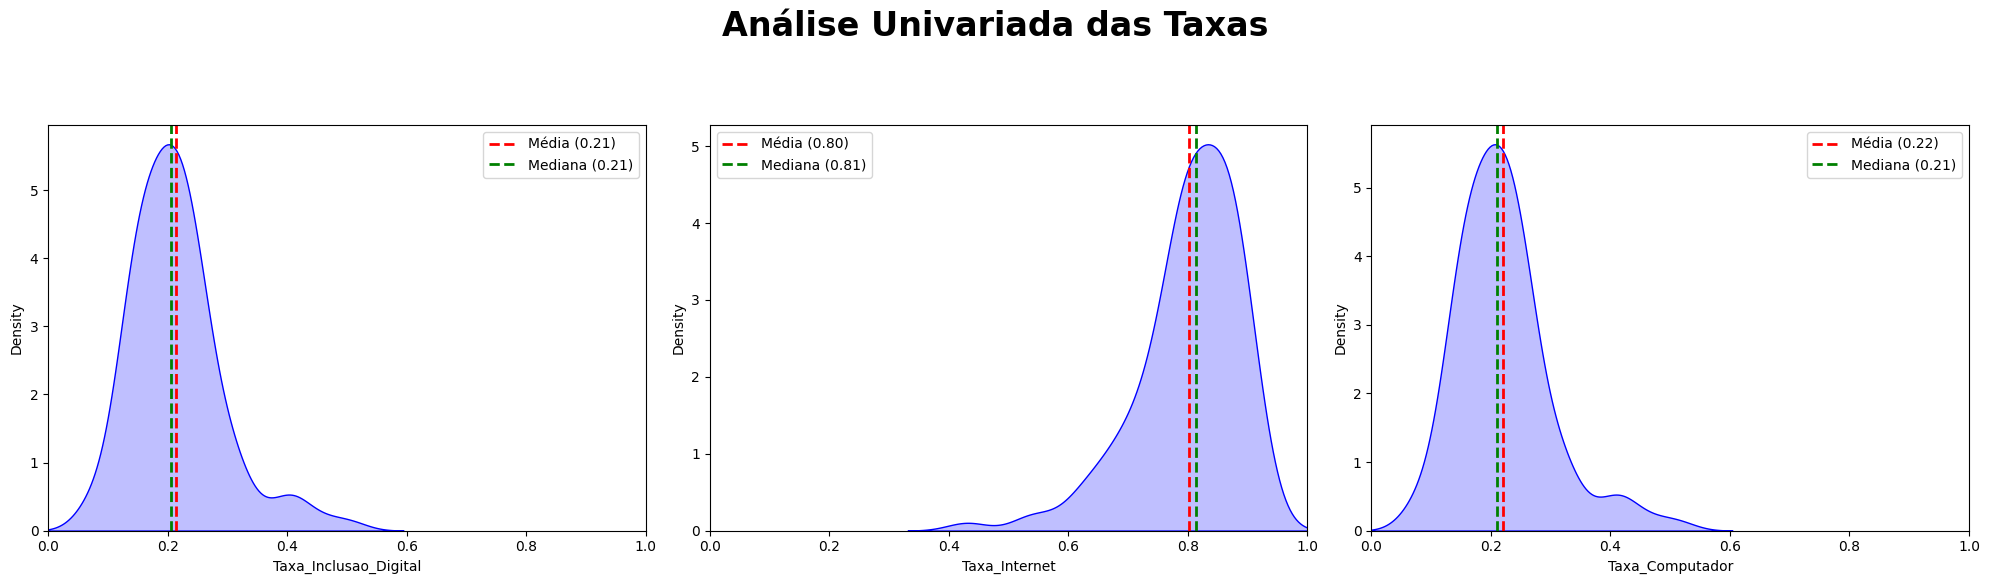

In [49]:
plt.figure(figsize=(20, 26))

# Título central ajustado para não colidir com os subplots
plt.suptitle(
    "Análise Univariada das Taxas",
    fontsize=24,
    fontweight='bold',
    y=0.92   # <-- posição mais alta, acima dos gráficos
)

numeric_features = ['Taxa_Inclusao_Digital', 'Taxa_Internet', 'Taxa_Computador']

for i, feature in enumerate(numeric_features):
    plt.subplot(5, 3, i+1)

    # KDE
    sns.kdeplot(
        data=df_indicadores_mun24,
        x=feature,
        fill=True,
        color='blue'
    )

    # Média e mediana
    media = df_indicadores_mun24[feature].mean()
    mediana = df_indicadores_mun24[feature].median()

    plt.axvline(media, color='red', linestyle='--', linewidth=2,
                label=f"Média ({media:.2f})")
    plt.axvline(mediana, color='green', linestyle='--', linewidth=2,
                label=f"Mediana ({mediana:.2f})")

    plt.xlabel(feature)
    plt.xlim(0, 1)
    plt.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.90])  # <-- reserva espaço p/ o título

plt.show()


In [50]:
df_indicadores_mun.sort_values(by=['Taxa_Inclusao_Digital'], ascending=False)

,NO_MUNICIPIO_RESIDENCIA,Total_Alunos,Total_Inclusao_Digital,Taxa_Inclusao_Digital,Internet,Taxa_Internet,Computador,Taxa_Computador,Nota_Redacao,Nota_CH,Nota_Mat,Nota_LC,Nota_CN,Nota_Media_Geral,Taxa_Alunos
166,São João do Jaguaribe,154,75,0.487013,113,0.733766,77,0.500000,586.233766,493.042208,513.388312,508.358442,464.687662,513.142078,0.000694
58,Fortaleza,70351,34178,0.485821,56014,0.796208,35425,0.503547,613.754175,523.633675,543.134415,533.192063,489.271030,540.597072,0.317013
50,Crato,3521,1681,0.477421,2797,0.794377,1756,0.498722,613.064470,507.513604,525.268134,520.515251,479.405538,529.153400,0.015866
98,Juazeiro do Norte,8042,3828,0.476001,6401,0.795946,4041,0.502487,610.517284,504.250311,528.072109,519.835551,476.566700,527.848391,0.036239
101,Limoeiro do Norte,1509,714,0.473161,1211,0.802518,757,0.501657,642.332671,512.691319,534.874884,525.915374,486.605699,540.483989,0.006800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Tururu,345,37,0.107246,133,0.385507,47,0.136232,505.391304,463.925797,470.799710,482.910435,437.100870,472.025623,0.001555
178,Umirim,412,35,0.084951,76,0.184466,52,0.126214,480.922330,462.291748,476.730097,479.358981,437.762621,467.413155,0.001857
61,General Sampaio,181,15,0.082873,77,0.425414,15,0.082873,490.386740,470.915470,491.646409,483.420994,443.155249,475.904972,0.000816
68,Guaramiranga,170,12,0.070588,48,0.282353,23,0.135294,496.117647,477.259412,486.618824,496.185882,443.811765,479.998706,0.000766


In [51]:
df_indicadores_mun24.sort_values(by=['Taxa_Inclusao_Digital'], ascending=False)

,NO_MUNICIPIO_PROVA,Nota_Redacao,Nota_CH,Nota_Mat,Nota_LC,Nota_CN,Nota_Media_Geral,Total_Alunos,Total_Inclusao_Digital,Taxa_Inclusao_Digital,Internet,Taxa_Internet,Computador,Taxa_Computador,Taxa_Alunos
1,Eusébio,666.740548,525.507366,559.525163,538.279596,507.755671,559.561669,2185,1105,0.505721,2033,0.930435,1123,0.513959,0.008719
0,Fortaleza,668.456779,531.157742,555.222515,537.999137,508.354819,560.238198,73356,34070,0.464447,63061,0.859657,34719,0.473295,0.292713
3,Juazeiro do Norte,665.648267,520.104735,543.445999,530.034189,497.468664,551.340371,9849,4205,0.426947,8610,0.874200,4288,0.435374,0.039301
2,Sobral,655.898193,519.152232,557.991073,528.540539,497.097492,551.735906,7187,2965,0.412550,6438,0.895784,3006,0.418255,0.028678
4,Limoeiro do Norte,668.751381,514.498729,541.825856,524.151878,497.044862,549.254541,2389,963,0.403098,2129,0.891168,981,0.410632,0.009533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,Paraipaba,624.791929,493.910340,525.827995,509.700000,478.497856,526.545624,1022,115,0.112524,615,0.601761,120,0.117417,0.004078
110,Orós,531.343284,474.511443,490.222886,497.963682,461.271891,491.062637,477,47,0.098532,301,0.631027,50,0.104822,0.001903
117,Pacoti,556.913580,452.636420,474.692469,474.669877,451.200123,482.022494,1012,87,0.085968,816,0.806324,91,0.089921,0.004038
106,Itatira,612.263868,449.687856,486.016492,470.842879,448.027136,493.367646,836,61,0.072967,602,0.720096,65,0.077751,0.003336


#### Correlação mudando

- "Em 2019, o 'Filtro Social' barrava o aluno na conexão (Internet). Quem passava pela barreira da internet, tinha chance.

- Em 2024, o filtro mudou de lugar. A porteira da internet foi aberta (correlação baixa), mas uma nova barreira, mais alta e rígida, foi erguida: a do Hardware (Computador).

Nossa métrica de Inclusão Digital Plena é robusta porque ela identifica exatamente quem conseguiu pular esse novo muro. Ela limpa o ruído do 'falso incluído' (o aluno que só tem celular) e foca no aluno que realmente tem estrutura de estudo."

In [ ]:
print("2019")
display(df_indicadores_mun[['Taxa_Computador', 'Nota_Media_Geral']].corr())
display(df_indicadores_mun[['Taxa_Internet', 'Nota_Media_Geral']].corr())
print("\n")
print("2024")
display(df_indicadores_mun24[['Taxa_Computador', 'Nota_Media_Geral']].corr())
display(df_indicadores_mun24[['Taxa_Internet', 'Nota_Media_Geral']].corr())


2019


,Taxa_Computador,Nota_Media_Geral
Taxa_Computador,1.000000,0.689898
Nota_Media_Geral,0.689898,1.000000


,Taxa_Internet,Nota_Media_Geral
Taxa_Internet,1.000000,0.467421
Nota_Media_Geral,0.467421,1.000000




2024


,Taxa_Computador,Nota_Media_Geral
Taxa_Computador,1.000000,0.734011
Nota_Media_Geral,0.734011,1.000000


,Taxa_Internet,Nota_Media_Geral
Taxa_Internet,1.000000,0.289767
Nota_Media_Geral,0.289767,1.000000


#### Municípios que precisam de ajuda

In [59]:
p25 = np.percentile(df_indicadores_mun24['Taxa_Inclusao_Digital'], 25)
df24_sos = df_indicadores_mun24[df_indicadores_mun24['Taxa_Inclusao_Digital'] <= p25]
df24_sos

,NO_MUNICIPIO_PROVA,Nota_Redacao,Nota_CH,Nota_Mat,Nota_LC,Nota_CN,Nota_Media_Geral,Total_Alunos,Total_Inclusao_Digital,Taxa_Inclusao_Digital,Internet,Taxa_Internet,Computador,Taxa_Computador,Taxa_Alunos
19,Mulungu,657.600000,496.381600,508.390800,508.920800,475.695200,529.397680,315,42,0.133333,174,0.552381,42,0.133333,0.001257
23,Canindé,633.329596,497.809417,525.296917,512.482679,470.030998,527.789922,2448,294,0.120098,1645,0.671977,313,0.127859,0.009768
25,Paraipaba,624.791929,493.910340,525.827995,509.700000,478.497856,526.545624,1022,115,0.112524,615,0.601761,120,0.117417,0.004078
38,Jaguaruana,620.764192,486.417249,516.794323,504.636681,472.778930,520.278275,1253,165,0.131684,790,0.630487,172,0.137271,0.005000
56,Chaval,610.571429,486.246857,497.419429,505.632571,465.088000,512.991657,431,63,0.146172,330,0.765661,64,0.148492,0.001720
65,Viçosa do Ceará,599.752358,482.289741,502.473762,499.496816,466.202123,510.042960,2140,317,0.148131,1424,0.665421,332,0.155140,0.008539
67,Barroquinha,602.550725,483.375942,499.408406,501.083188,461.904058,509.664464,476,69,0.144958,374,0.785714,74,0.155462,0.001899
75,Trairi,598.775194,475.858295,505.966202,496.539535,463.543876,508.136620,1577,228,0.144578,1265,0.802156,239,0.151554,0.006293
78,Aracoiaba,604.935345,472.254741,502.024353,492.641272,458.461746,506.063491,1119,178,0.159071,871,0.778374,182,0.162645,0.004465
82,Pindoretama,589.891697,473.967329,497.451444,498.972563,464.423105,504.941227,716,101,0.141061,565,0.789106,105,0.146648,0.002857


#### Relação entre variação da taxa e variação de alunos

In [88]:
df_merge = pd.merge(df_indicadores_mun, df_indicadores_mun24, how='left' ,
                    left_on= 'NO_MUNICIPIO_RESIDENCIA',
                    right_on='NO_MUNICIPIO_PROVA',
                    suffixes=('_19', '_24'))


In [94]:
df24[df24['NO_MUNICIPIO_ESC'].str.contains('Aiu', na=False)]

,NU_SEQUENCIAL,NU_ANO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Nota_Media_Geral
27802,453160,2024,23104147.0,2300408.0,Aiuaba,23.0,CE,2.0,1.0,1.0,2313302,Tauá,23,CE,1,1,1,1,1422.0,1384.0,1396.0,1410.0,385.4,351.8,433.1,485.7,BCEADBAEADECDAACAECDBAADCDBEADEBCBCDDCCCEBBEC,DDCBAABCDBABCDBEDBBCADEAEDDEEBAEBCBEBCEECDADA,BDCACBBDACBCCBEABDEABADAECEADABBCDDECCECDABEA,ABDEDCDDBCDBBDBEAEBDACBDDCBACDECBCEBDAEBDECED,1,BBCEDBBAEXCCAEDDBCAEDAACAAEDDDEBBECBCEEDCAACD,DADABCDCECEDEBBBEBCDBADACBCADCEBEADBAECAECEDA,AACEADDDACDADECBBDBEEBDDECCBEDDCADBBDEBCEBDCEC...,DBCECEACADABBECBEDADCCDCCABBBCECEBCEADABBADDD,1.0,80.0,120.0,40.0,120.0,0.0,360.0,403.20
168487,1670041,2024,23275065.0,2300408.0,Aiuaba,23.0,CE,2.0,2.0,1.0,2313302,Tauá,23,CE,1,1,1,1,1422.0,1384.0,1396.0,1410.0,382.7,348.1,475.5,407.0,CCACDAEAADEEDADCCCCBBBEDBCABDCEDBCADCACBDCDAE,DDCCBDDCACCBDADBDEBDBBDCACEDBEDBACEBECBCCDBCE,BBEBCCADBCCBDEEEADCCBCBBCDADADADCBBBDACADDBEA,CADBCCBDDABDECCCACADCBDCCEECCBBDADEECABBEDADB,0,BBCEDBBAEXCCAEDDBCAEDAACAAEDDDEBBECBCEEDCAACD,DADABCDCECEDEBBBEBCDBADACBCADCEBEADBAECAECEDA,AACEADDDACDADECBBDBEEBDDECCBEDDCADBBDEBCEBDCEC...,DBCECEACADABBECBEDADCCDCCABBBCECEBCEADABBADDD,9.0,0.0,0.0,0.0,0.0,0.0,0.0,322.66
236989,475969,2024,23104147.0,2300408.0,Aiuaba,23.0,CE,2.0,1.0,1.0,2313302,Tauá,23,CE,1,1,1,1,1419.0,1385.0,1398.0,1407.0,513.4,544.0,577.8,607.8,BEEDCBBEDCCDCEACDDAAEBECECDEAEDCAACAEDEDBCBCD,DCBCCBDBCCCDEDBDEEEACDCADBCDEEBDEABECBDACBEAD,CDADBCDCBDEECCDBDCBCADEEBDBECAEBCEBDABDDDEECB,DABABCABDDCCBBCDCACEACCEEBBDDCCEDCBEBEDABDECC,1,BCEAACDEDCAAEDDDEBBDDBECCAEDBBAAACCAEEXCBBCED,CAEDBADBEBCCEDADBAEACBCADCEDEBBEBACECEABCDDAD,EAAACDDCDADDCBDEECEECBDCDADEEBCBEBADBCEBDBDDDD...,ABBABBADDDBBCECEADCEBCCCDBADCBEDAECADACDBCECE,1.0,140.0,120.0,120.0,160.0,180.0,720.0,592.60
282034,26219,2024,23104147.0,2300408.0,Aiuaba,23.0,CE,2.0,1.0,1.0,2313302,Tauá,23,CE,1,1,1,1,1422.0,1384.0,1396.0,1410.0,386.4,414.1,444.8,407.4,DDCBAEAADDBEAAEECCEAACDDACACEBCBECAEBBDDCEEBC,ADDAABCAEEDECAEBECACEBEBBEEBCEEADAABEEAADCCEB,DDEADEEBCCBCDBAEDEDCBDBDDEEEEECEEBDCCAEBBBBCE,CCDEBADDCADACABCDDCCBEABAEBCABCACEBCEEBCDCCCA,0,BBCEDBBAEXCCAEDDBCAEDAACAAEDDDEBBECBCEEDCAACD,DADABCDCECEDEBBBEBCDBADACBCADCEBEADBAECAECEDA,AACEADDDACDADECBBDBEEBDDECCBEDDCADBBDEBCEBDCEC...,DBCECEACADABBECBEDADCCDCCABBBCECEBCEADABBADDD,1.0,100.0,120.0,80.0,120.0,140.0,560.0,442.54
286098,1346302,2024,23104147.0,2300408.0,Aiuaba,23.0,CE,2.0,1.0,1.0,2313302,Tauá,23,CE,1,1,1,1,1420.0,1383.0,1395.0,1408.0,461.8,542.7,537.7,458.2,BCEEEDCBEECDCADDDCDCDCBEBCDDDCCDCCECEABBDBECB,AEABBECDBCCDDECBBCACCADCEBACAABAEDBDAEBBDACDA,CEBDBBEBECBEDABDEDBCEDBAEBCABEBBDADECBEDACEDA,DDCDDCEBACBDBAADDADEABDECECBBCACDBDBAACEEDCDD,1,CAEDAACCAEEXCBBAEDBBCAACDEDCBCEECAAEDDDEBBDDB,CECEBEBCDBADDEBBABCDCAECEDADBAEABEADCEDADACBC,CAAAECDDDAECBECEDDCBDEDDCECBDCBCEADBBDBDDCBEDA...,CECEBEDADCAADECDBBCEBDCCCACABBABBADDDCEADBBCE,1.0,120.0,120.0,100.0,120.0,160.0,620.0,524.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4132134,191552,2024,23104147.0,2300408.0,Aiuaba,23.0,CE,2.0,1.0,1.0,2313302,Tauá,23,CE,1,1,1,1,1422.0,1384.0,1396.0,1410.0,477.2,469.3,475.8,490.1,CCBDABBCBCBEAEDAACBEDBABDDDBEABDDDCDBADCDADCC,AABEACDCECEDCEABBACDECAB*EDBCEAEDACEEDCBDCDCA,ABAEDBACEEBEDACCDDCBADADDAAEEDADEBCADAEEDECDC,ACEEACDDBBCECCBACECECEBDEABDADCBCADCDEADAECBD,1,BBCEDBBAEXCCAEDDBCAEDAACAAEDDDEBBECBCEEDCAACD,DADABCDCECEDEB

# Hipótese IA Generativa e Redação
Queremos propor a hipótese de que houve uma melhora no desempenho dos alunos em redação por conta da chegada da IA generativa, dado que esta é nativamente linguística. Com isso, aliado à conectividade facilitaria ainda mais o desempenho dos alunos, independente do dispositivo utilizado, o que poderia explicar parte da melhora das notas, apesar da queda da inclusão digital, alavancada pela falta de dispositivos como computadores e notebook

- Elaborar gráfico comparando as taxas analisadas num gráfico de barras
- Elaborar gráfico comparando as variações percentuais de um ano pra outro das notas do ENEM, e checar se redação possui um aumento maior

In [52]:
def grafico_comparativo(df_indicadores_mun, df_indicadores_mun24, notas = False):
  df_final = pd.merge(
    df_indicadores_mun[['NO_MUNICIPIO_RESIDENCIA', 'Taxa_Inclusao_Digital', 'Taxa_Computador', 'Taxa_Internet', 'Nota_Media_Geral', 'Nota_Redacao','Nota_CH', 'Nota_Mat', 'Nota_CN', 'Nota_LC', 'Total_Alunos']],
    df_indicadores_mun24[['NO_MUNICIPIO_PROVA', 'Taxa_Inclusao_Digital', 'Taxa_Computador', 'Taxa_Internet', 'Nota_Media_Geral', 'Nota_Redacao','Nota_CH', 'Nota_Mat', 'Nota_CN', 'Nota_LC','Total_Alunos']],
    right_on='NO_MUNICIPIO_PROVA',
    left_on='NO_MUNICIPIO_RESIDENCIA',
    suffixes=('_2019', '_2024'))
  
  # condicionar flag notas
  if notas:
    metricas = {
    'Nota_Media_Geral': 'Nota Média',
    'Nota_Redacao': 'Nota Redação',
    'Nota_CH': 'Nota CH',
    'Nota_LC': 'Nota LC',
    'Nota_CN': 'Nota CN',
    'Nota_Mat': 'Nota Mat',

    }
    
  else:
    metricas = {
    'Taxa_Inclusao_Digital': 'Taxa Inclusão Digital',
    'Taxa_Computador': 'Taxa Computador',
    'Taxa_Internet': 'Taxa Internet',
    'Total_Alunos': 'Total de Alunos (Média Mun.)'}


  dados_resumo = []
  # criar tabela de resumo
  for metrica_db, metrica_nome in metricas.items():
      valor_19 = df_final[f'{metrica_db}_2019'].mean()
      valor_24 = df_final[f'{metrica_db}_2024'].mean()
      
      if metrica_db == 'Total_Alunos':
          valor_19 = df_final[f'{metrica_db}_2019'].sum()
          valor_24 = df_final[f'{metrica_db}_2024'].sum()
          metrica_nome = 'Total de Alunos (Soma Estado)'
      
      delta = valor_24 - valor_19
      var_pct = (delta / valor_19) * 100
      
      dados_resumo.append({
          'Indicador': metrica_nome,
          '2019': valor_19,
          '2024': valor_24,
          'Diferença': delta,
          'Variação (%)': var_pct
      })

  df_resumo_executivo = pd.DataFrame(dados_resumo)

  display(df_resumo_executivo) 

  # gerar gráfico
  df_plot = df_resumo_executivo[df_resumo_executivo['Indicador'] != 'Total de Alunos (Soma Estado)'].melt(
      id_vars='Indicador', 
      value_vars=['2019', '2024'], 
      var_name='Ano', 
      value_name='Valor'
  )

  plt.figure(figsize=(14, 9))
  grafico = sns.barplot(data=df_plot, x='Indicador', y='Valor', hue='Ano', palette=['gray', 'blue'])

  plt.title('Comparativo de Indicadores: 2019 vs 2024', fontsize=14)
  plt.ylabel('Taxa Média / Nota')
  plt.xticks(rotation=15)
  plt.legend(title='Ano')


  for container in grafico.containers:
      grafico.bar_label(container, fmt='%.2f', padding=3)

  plt.tight_layout()
  plt.show()


,Indicador,2019,2024,Diferença,Variação (%)
0,Taxa Inclusão Digital,0.264431,0.214464,-0.049968,-18.896266
1,Taxa Computador,0.283944,0.219900,-0.064044,-22.555149
2,Taxa Internet,0.601356,0.801192,0.199836,33.230813
3,Total de Alunos (Soma Estado),205062.000000,250607.000000,45545.000000,22.210356


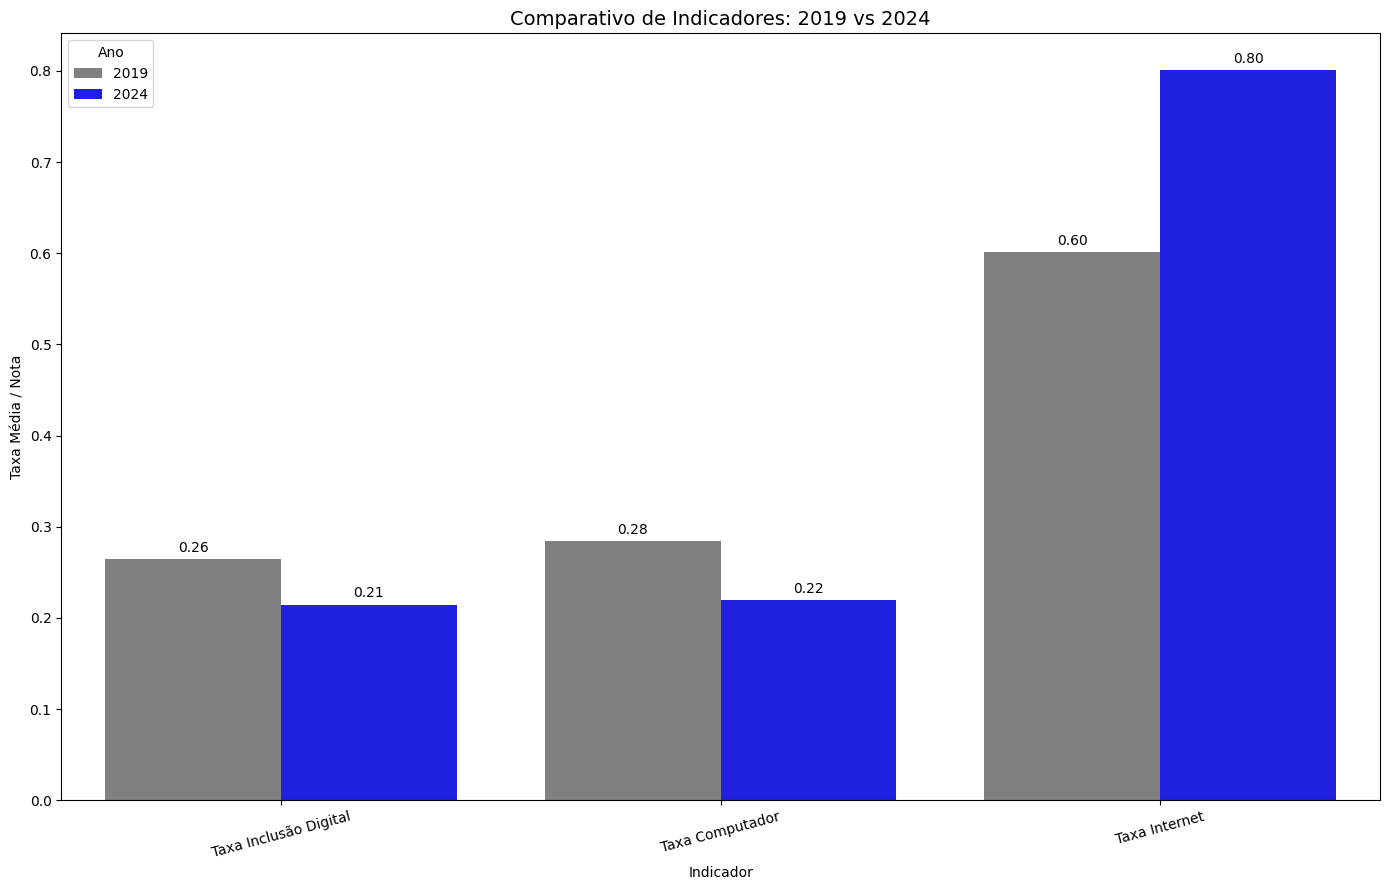

,Indicador,2019,2024,Diferença,Variação (%)
0,Nota Média,497.284015,513.742498,16.458483,3.309675
1,Nota Redação,545.596906,601.706399,56.109492,10.284056
2,Nota CH,484.512138,485.208357,0.696219,0.143695
3,Nota LC,500.407617,502.731409,2.323793,0.464380
4,Nota CN,454.359160,469.293367,14.934207,3.286873
5,Nota Mat,501.544255,509.772958,8.228703,1.640673


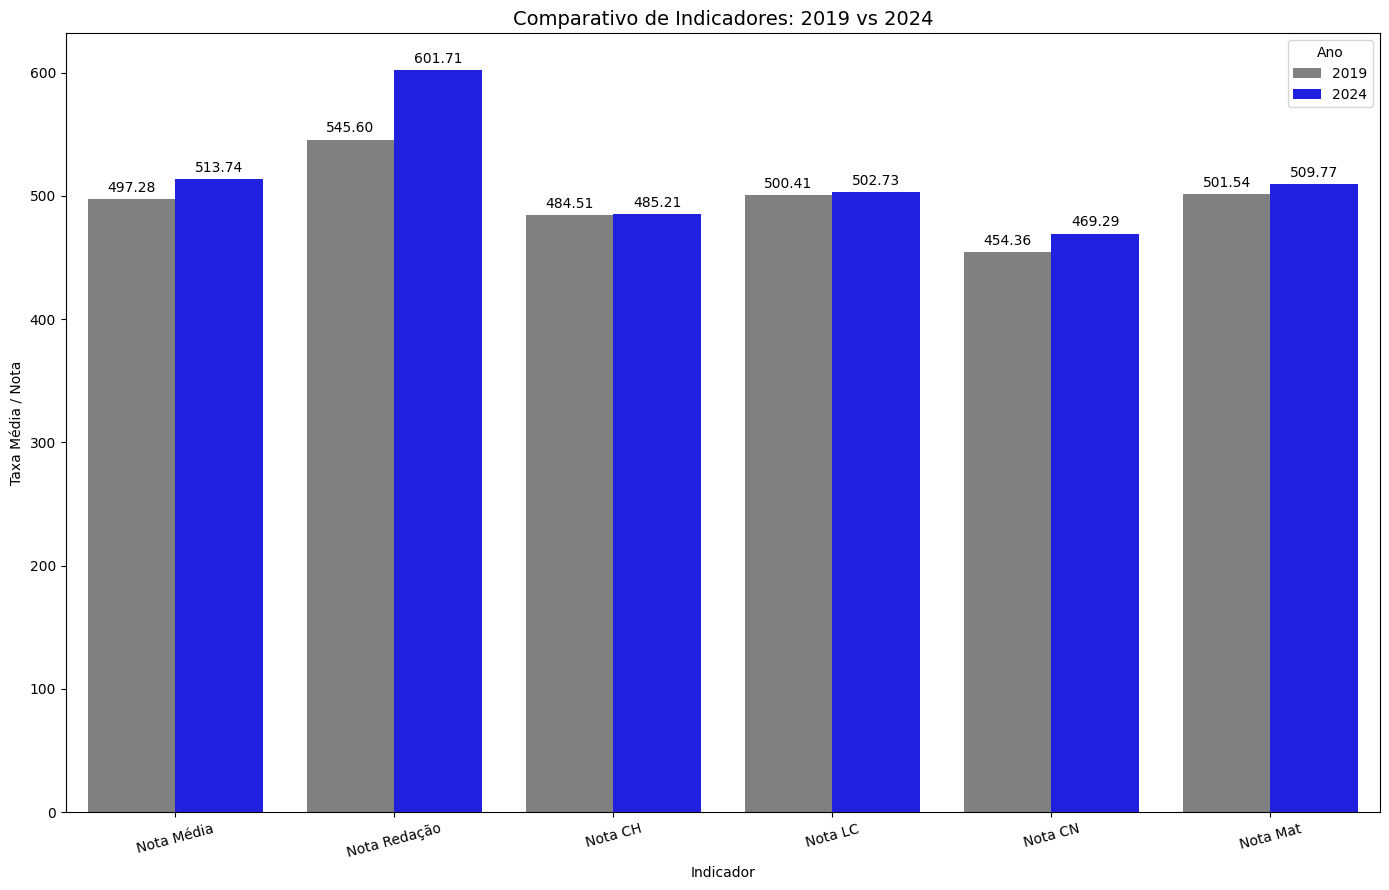

In [53]:
grafico_comparativo(df_indicadores_mun=df_indicadores_mun, df_indicadores_mun24=df_indicadores_mun24, notas = 0)
print("\n\n\n\n")
grafico_comparativo(df_indicadores_mun=df_indicadores_mun, df_indicadores_mun24=df_indicadores_mun24, notas = 1)


## Salvar dados

In [55]:
df_indicadores_mun.to_csv('indicadores19.csv')
df_indicadores_mun24.to_csv('indicadores24.csv')

# Causal Inference

O Problema: A simples diferença de médias diz que quem tem internet tira X pontos a mais. Isso é verdade ou é apenas reflexo da riqueza?

A Metodologia: Usamos Inferência Causal para simular o contrafactual (O aluno com internet, caso não a tivesse).

O Resultado (ATT): "Corrigindo pelo viés socioeconômico, a internet agrega X pontos na média."

O Insight (CATE): "Entretanto, para alunos de baixa renda, a internet tem um impacto Y% maior do que para alunos de alta renda."

In [ ]:
colunas_interesse = [
    'NU_INSCRICAO', 'NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 'SG_UF_RESIDENCIA', 
    'TP_ESCOLA', 'IN_TREINEIRO',
    'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 
    'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 
    'TP_STATUS_REDACAO',
    'Q001', 'Q002', 'Q006', 'Q024', 'Q025', 'SG_UF_PROVA', 'NO_MUNICIPIO_PROVA'
]

In [ ]:
df = df_raw[colunas_interesse]

In [ ]:
df = df[
  (df['SG_UF_RESIDENCIA'] == 'CE') & (df['NO_MUNICIPIO_PROVA'] != 'Fortaleza')
   ]

In [ ]:
df['NU_NOTA_GERAL'] = (df['NU_NOTA_CN'] + df['NU_NOTA_CH'] + df['NU_NOTA_LC'] + df['NU_NOTA_MT'] + df['NU_NOTA_REDACAO']) / 5


In [ ]:
df['Computador e Internet'] = np.where(
  (df['Q025'] == 'B') & (df['Q024'] != "A"),1, 0
)

In [ ]:
df['Computador'] = np.where(
  (df['Q025'] == 'B'),1, 0
)

In [ ]:
df['Computador'].value_counts(normalize=True)

Computador
1    0.620751
0    0.379249
Name: proportion, dtype: float64

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(df['Q001'])
df['Q001_encoded'] = le.transform(df['Q001'])
# Criar uma nova coluna chamada 'Q006_encoded' no DataFrame df
le.fit(df['Q006'])
df['Q006_encoded'] = le.transform(df['Q006'])


In [ ]:
# Lista de variáveis a serem convertidas
confundidores = [
    'Q006', 'Q001', 'Q002', 'TP_ESCOLA', 'TP_COR_RACA', 
    'NU_IDADE', 'SG_UF_RESIDENCIA'
]

# Converter cada variável para numérica (exceto NU_IDADE que já é numérica)
for coluna in confundidores:
    if coluna in df.columns:
        if coluna != 'NU_IDADE':  # Pula a coluna de idade
            df[coluna] = pd.factorize(df[coluna])[0]  # Converte categorias em códigos numéricos
    else:
        print(f"Aviso: Coluna '{coluna}' não encontrada no DataFrame.")

# Verificar os tipos de dados resultantes
df

,NU_INSCRICAO,NU_IDADE,TP_SEXO,TP_COR_RACA,SG_UF_RESIDENCIA,TP_ESCOLA,IN_TREINEIRO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,...,Q006,Q024,Q025,SG_UF_PROVA,NO_MUNICIPIO_PROVA,NU_NOTA_GERAL,Computador e Internet,Computador,Q001_encoded,Q006_encoded
73,190001133213,26.0,M,0,0,0,0,0,0,0,...,0,B,B,CE,Juazeiro do Norte,NaN,1,1,4,3
90,190001133215,23.0,M,0,0,1,0,0,0,0,...,1,A,A,CE,Juazeiro do Norte,NaN,0,0,1,0
126,190001133216,24.0,F,1,0,1,0,0,0,0,...,0,B,B,CE,Quixeramobim,NaN,1,1,0,3
193,190001133218,21.0,F,2,0,1,0,1,1,1,...,2,A,B,CE,Eusébio,583.82,0,1,1,1
195,190001133220,22.0,M,2,0,1,0,0,0,0,...,2,B,B,CE,Tauá,NaN,1,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5095133,190005703237,35.0,M,0,0,1,0,1,1,1,...,6,B,B,CE,Crateús,646.72,1,1,1,7
5095136,190005703238,18.0,M,4,0,0,0,0,0,0,...,2,A,A,CE,Juazeiro do Norte,NaN,0,0,7,1
5095179,190005703239,33.0,M,1,0,1,0,1,1,1,...,3,B,B,CE,Quixeramobim,443.48,1,1,0,2
5095217,190005701188,19.0,M,0,0,1,0,0,0,0,...,3,B,B,CE,Barreira,NaN,1,1,6,2


In [ ]:
# Definindo os limites (ex: 5% e 95%)
min_ps = 0.05
max_ps = 0.87



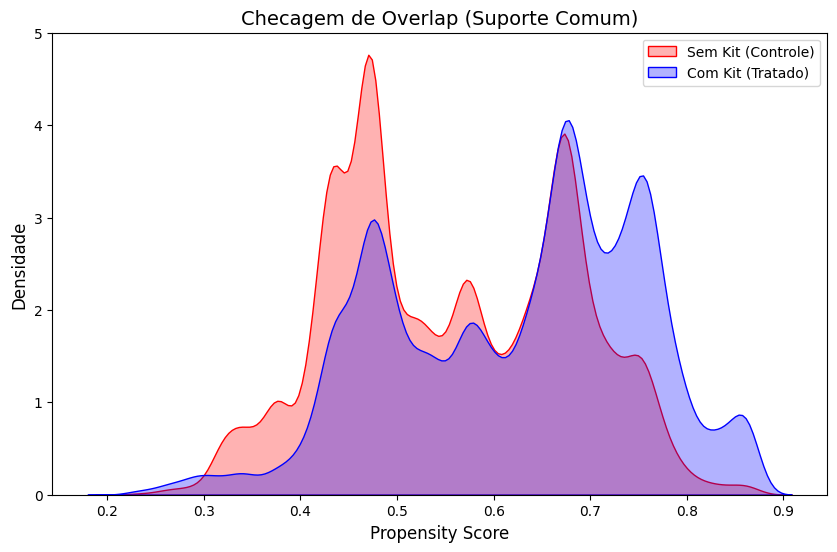

In [ ]:
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Defina seus Confundidores (X) e Tratamento (T)
# Adicione aqui todas as variáveis que causam T e Y (ex: Renda, Escolaridade Mãe, Tipo Escola, Raça)
# IMPORTANTE: As variáveis categóricas devem estar codificadas (Get Dummies ou LabelEncoder)
# confundidores = ['Q006_encoded', 'Q001_encoded', 'TP_ESCOLA', 'NU_NOTA_CH', 'NU_NOTA_LC'] # Exemplo
X = df[confundidores].fillna(0) # Trate nulos antes
T = df['Computador'] # Sua variável binária criada

# 2. Calcule o Propensity Score
# Usamos Logistic Regression para estimar P(T=1 | X)
clf = LogisticRegression(solver='liblinear', random_state=42)
clf.fit(X, T)
ps_score = clf.predict_proba(X)[:, 1] # Pega a prob da classe 1

# Adiciona ao dataframe para plotar
df['ps_score'] = ps_score

# Filtrando o dataframe (Trimming)
df_trim = df[
    (df['ps_score'] >= min_ps) & 
    (df['ps_score'] <= max_ps)
]

# 3. Plote o Gráfico
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_trim[df_trim['Computador'] == 0], x='ps_score', fill=True, label='Sem Kit (Controle)', color='red', alpha=0.3)
sns.kdeplot(data=df_trim[df_trim['Computador'] == 1], x='ps_score', fill=True, label='Com Kit (Tratado)', color='blue', alpha=0.3)

plt.title('Checagem de Overlap (Suporte Comum)', fontsize=14)
plt.xlabel('Propensity Score', fontsize=12)
plt.ylabel('Densidade', fontsize=12)
plt.legend()
plt.show()

In [ ]:

# Supondo que seu dataframe seja 'df' e já tenha as colunas:
# 'ps_score': o score que você gerou no gráfico
# 'Computador e Internet': seu T (0 ou 1)
# 'NU_NOTA_GERAL': sua variável Y (média das notas, ou a nota que vc quer analisar)

# 1. Definir limites de Trimming (Segurança Estatística)
# Vamos manter apenas alunos onde há disputa real entre ter e não ter o kit
min_score = 0.05
max_score = 0.95

mask_overlap = (df['ps_score'] >= min_score) & (df['ps_score'] <= max_score)
df_trimmed = df[mask_overlap].copy()

print(f"Linhas originais: {len(df)}")
print(f"Linhas após trimming: {len(df_trimmed)} (Perda segura para garantir robustez)")

# 2. Calcular os Pesos (Weights) para ATT
# Para quem TEM computador (T=1), o peso é 1.
# Para quem NÃO TEM (T=0), o peso é odds = PS / (1 - PS).
# Isso faz os "sem computador" que parecem ricos valerem por muitos.

df_trimmed['w_att'] = np.where(
    df_trimmed['Computador e Internet'] == 1,
    1,
    df_trimmed['ps_score'] / (1 - df_trimmed['ps_score'])
)

# 3. Calcular o Efeito Causal (Diferença de Médias Ponderada)
# Y1: Média ponderada dos Tratados
y1_w = np.average(df_trimmed.loc[df_trimmed['Computador e Internet']==1, 'NU_NOTA_GERAL'],
                  weights=df_trimmed.loc[df_trimmed['Computador e Internet']==1, 'w_att'])

# Y0: Média ponderada dos Controles (O Contrafactual!)
y0_w = np.average(df_trimmed.loc[df_trimmed['Computador e Internet']==0, 'NU_NOTA_GERAL'],
                  weights=df_trimmed.loc[df_trimmed['Computador e Internet']==0, 'w_att'])

att = y1_w - y0_w

# 4. Comparação "Naïve" (Ingênua - sem causalidade)
naive_diff = df_trimmed[df_trimmed['Computador e Internet']==1]['NU_NOTA_GERAL'].mean() - \
             df_trimmed[df_trimmed['Computador e Internet']==0]['NU_NOTA_GERAL'].mean()

print(f"\n--- RESULTADOS ---")
print(f"Diferença 'Ingênua' (Média simples): {naive_diff:.2f} pontos")
# print(f"ATT Estimado (Efeito Causal Real):   {att:.2f} pontos")
# print(f"Viés de Seleção removido:            {naive_diff - att:.2f} pontos")
print(y1_w)

Linhas originais: 201008
Linhas após trimming: 195843 (Perda segura para garantir robustez)

--- RESULTADOS ---
Diferença 'Ingênua' (Média simples): 52.53 pontos
nan
